In [415]:
import pandas as pd
import numpy as np
import scipy.stats as scipy
import matplotlib.pyplot as plt
import io 
import seaborn as sns
%matplotlib inline

In [416]:
# Read data from the CSV into a dataframe

df = ("C:/Users/prade/OneDrive/Desktop/Football")
df1 = pd.read_csv("C:/Users/prade/OneDrive/Desktop/Football/2016-17.csv")
df2 = pd.read_csv("C:/Users/prade/OneDrive/Desktop/Football/2017-18.csv")
df3 = pd.read_csv("C:/Users/prade/OneDrive/Desktop/Football/2018-19.csv")

In [417]:
# Selecting the features

df1 = df1[['HomeTeam','AwayTeam','FTHG','FTAG','FTR','HTHG','HTAG','HTR','HS','AS','HST','AST','HF','AF','HC','AC','HY','AY','HR','AR']]
df2 = df2[['HomeTeam','AwayTeam','FTHG','FTAG','FTR','HTHG','HTAG','HTR','HS','AS','HST','AST','HF','AF','HC','AC','HY','AY','HR','AR']]
df3 = df3[['HomeTeam','AwayTeam','FTHG','FTAG','FTR','HTHG','HTAG','HTR','HS','AS','HST','AST','HF','AF','HC','AC','HY','AY','HR','AR']]

In [418]:
# Concating the data on one dataframe

playing_stat = pd.concat([df1,df2,df3],ignore_index=True)

In [419]:
playing_stat.tail()

,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
1135,Liverpool,Wolves,2,0,H,1,0,H,13,7,5,2,3,11,4,1,0,2,0,0
1136,Man United,Cardiff,0,2,A,0,1,A,26,13,10,4,9,6,11,2,3,3,0,0
1137,Southampton,Huddersfield,1,1,D,1,0,H,10,10,3,3,8,6,4,3,0,1,0,0
1138,Tottenham,Everton,2,2,D,1,0,H,11,17,3,9,10,13,7,4,0,2,0,0
1139,Watford,West Ham,1,4,A,0,2,A,17,16,8,9,10,10,7,2,1,0,1,0


In [420]:
playing_stat.head()

,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
0,Man United,Leicester,0,1,A,0,0,D,10,17,3,9,10,14,7,4,3,2,0,0
1,Bournemouth,Cardiff,0,1,A,0,0,D,14,13,4,3,12,15,3,6,2,2,0,0
2,Fulham,Crystal Palace,1,1,D,1,0,H,12,13,6,4,10,14,5,6,0,0,0,0
3,Huddersfield,Chelsea,2,1,H,1,0,H,14,18,5,5,8,17,5,3,2,2,0,0
4,Newcastle,Tottenham,2,1,H,1,0,H,16,7,4,3,11,14,9,6,1,2,0,0


In [421]:
# Creating csv file from the merged dataframe

playing_stat.to_csv("C:/Users/prade/OneDrive/Desktop/Football/Merged_dataset.csv")

In [422]:
df = pd.read_csv("C:/Users/prade/OneDrive/Desktop/Football/Merged_dataset.csv")

In [423]:
table = pd.DataFrame(columns=('Team','HGS','AGS','HAS','AAS','HGC','AGC','HDS','ADS'))

avg_home_scored = df.FTHG.sum() / 1140.0
avg_away_scored = df.FTAG.sum() / 1140.0
avg_home_conceded = avg_away_scored
avg_away_conceded = avg_home_scored
print(avg_away_conceded)

1.5657894736842106


In [424]:
res_home = df.groupby('HomeTeam')
res_away = df.groupby('AwayTeam')

In [425]:
table.Team = res_home.groups
table.HGS = res_home.FTHG.sum().values
table.HGC = res_home.FTAG.sum().values
table.AGS = res_away.FTAG.sum().values
table.AGC = res_away.FTHG.sum().values
#19 Home matches for each team each season and 3 seasons therefore 57 home matches and 57 away matches
table.HAS = (table.HGS / 57.0) / avg_home_scored
table.AAS = (table.AGS / 57.0) / avg_away_scored
table.HDS = (table.HGC / 57.0) / avg_home_conceded
table.ADS = (table.AGC / 57.0) / avg_away_conceded

table

,Team,HGS,AGS,HAS,AAS,HGC,AGC,HDS,ADS
Arsenal,Arsenal,106,67,1.187675,0.978817,54,89,0.788897,0.997199
Bournemouth,Bournemouth,80,58,0.896359,0.847334,77,100,1.124909,1.120448
Brighton,Brighton,78,55,0.873950,0.803506,85,97,1.241782,1.086835
Burnley,Burnley,84,59,0.941176,0.861943,79,88,1.154127,0.985994
Cardiff,Cardiff,92,49,1.030812,0.715851,78,93,1.139518,1.042017
Chelsea,Chelsea,99,70,1.109244,1.022644,55,82,0.803506,0.918768
Crystal Palace,Crystal Palace,82,94,0.918768,1.373265,62,95,0.905771,1.064426
Everton,Everton,95,79,1.064426,1.154127,67,94,0.978817,1.053221
Fulham,Fulham,77,56,0.862745,0.818115,85,97,1.241782,1.086835
Huddersfield,Huddersfield,64,62,0.717087,0.905771,78,98,1.139518,1.098039


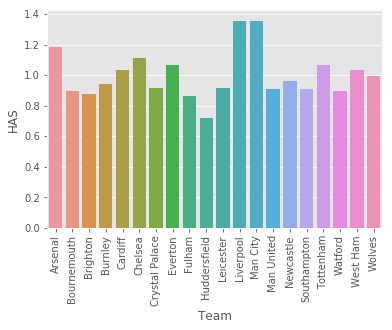

In [426]:
has_plot = sns.barplot(table.Team,table.HAS)
for item in has_plot.get_xticklabels():
    item.set_rotation(90)

In [427]:
#Extract necessary features from the data file
feature_table = df.iloc[:,:23]

#Full Time Result(FTR), Home Shots on Target(HST), Away Shots on Target(AST), Home Corners(HC), Away Corners(AC)
feature_table = feature_table[['HomeTeam','AwayTeam','FTR','HST','AST','HC','AC']]

#Home Attacking Strength(HAS), Home Defensive Strength(HDS), Away Attacking Strength(AAS), Away Defensive Strength(ADS)
f_HAS = []
f_HDS = []
f_AAS = []
f_ADS = []
for index,row in feature_table.iterrows():
    f_HAS.append(table[table['Team'] == row['HomeTeam']]['HAS'].values[0])
    f_HDS.append(table[table['Team'] == row['HomeTeam']]['HDS'].values[0])
    f_AAS.append(table[table['Team'] == row['AwayTeam']]['AAS'].values[0])
    f_ADS.append(table[table['Team'] == row['AwayTeam']]['ADS'].values[0])

feature_table['HAS'] = f_HAS
feature_table['HDS'] = f_HDS
feature_table['AAS'] = f_AAS
feature_table['ADS'] = f_ADS
feature_table

,HomeTeam,AwayTeam,FTR,HST,AST,HC,AC,HAS,HDS,AAS,ADS
0,Man United,Leicester,A,3,9,7,4,0.907563,0.934989,1.008035,0.952381
1,Bournemouth,Cardiff,A,4,3,3,6,0.896359,1.124909,0.715851,1.042017
2,Fulham,Crystal Palace,D,6,4,5,6,0.862745,1.241782,1.373265,1.064426
3,Huddersfield,Chelsea,H,5,5,5,3,0.717087,1.139518,1.022644,0.918768
4,Newcastle,Tottenham,H,4,3,9,6,0.963585,1.037253,1.008035,1.064426
5,Watford,Brighton,D,2,1,9,6,0.896359,1.124909,0.803506,1.086835
6,Wolves,Everton,D,6,1,6,2,0.997199,0.818115,1.154127,1.053221
7,Arsenal,Man City,A,5,7,5,4,1.187675,0.788897,1.285610,0.941176
8,Liverpool,West Ham,A,3,7,4,2,1.355742,0.745069,0.934989,1.030812
9,Southampton,Burnley,H,6,3,7,1,0.907563,1.154127,0.861943,0.985994


In [428]:
feature_table.to_csv("C:/Users/prade/OneDrive/Desktop/Football/Feature_table.csv")

In [429]:
#Function to transform FTR into numeric data type
def transformResult(row):
    if(row.FTR == 'H'):
        return 1
    elif(row.FTR == 'A'):
        return -1
    else:
        return 0

In [430]:
feature_table["Result"] = feature_table.apply(lambda row: transformResult(row),axis=1)
feature_table.tail()

,HomeTeam,AwayTeam,FTR,HST,AST,HC,AC,HAS,HDS,AAS,ADS,Result
1135,Liverpool,Wolves,H,5,2,4,1,1.355742,0.745069,0.978817,1.019608,1
1136,Man United,Cardiff,A,10,4,11,2,0.907563,0.934989,0.715851,1.042017,-1
1137,Southampton,Huddersfield,D,3,3,4,3,0.907563,1.154127,0.905771,1.098039,0
1138,Tottenham,Everton,D,3,9,7,4,1.064426,0.876552,1.154127,1.053221,0
1139,Watford,West Ham,A,8,9,7,2,0.896359,1.124909,0.934989,1.030812,-1


In [432]:
feature_table.head()

,HomeTeam,AwayTeam,FTR,HST,AST,HC,AC,HAS,HDS,AAS,ADS,Result
0,Man United,Leicester,A,3,9,7,4,0.907563,0.934989,1.008035,0.952381,-1
1,Bournemouth,Cardiff,A,4,3,3,6,0.896359,1.124909,0.715851,1.042017,-1
2,Fulham,Crystal Palace,D,6,4,5,6,0.862745,1.241782,1.373265,1.064426,0
3,Huddersfield,Chelsea,H,5,5,5,3,0.717087,1.139518,1.022644,0.918768,1
4,Newcastle,Tottenham,H,4,3,9,6,0.963585,1.037253,1.008035,1.064426,1


In [433]:
feature_table.to_csv("C:/Users/prade/OneDrive/Desktop/Football/Feature_table.csv")

In [434]:
##Learning with new features
#Initially, we add just the teams' attacking strength, defensive strength as features. In the second try, we also add the number of shots on target and the number of corners taken by both teams. This might be a good indication of teams scoring more goals and winning the game. We see an increase in the accuracy of the classifier after these new features are added into the model.
#Since there are three possible results to any given fixture, with a Random Benchmark Model where we randomly pick on of the three outcomes as the final result, we will end up with an overall accuracy of 33%. On careful feature engineering, we will try to improve the model to give a much better accuracy.
#Two sets of training sets - adding features.
X_train = feature_table[['HAS','HDS','AAS','ADS']]
X_train_2 = feature_table[['HAS','HDS','AAS','ADS','HST','AST','HC','AC']]
y_train = feature_table['Result']
display(X_train.tail())
display(X_train_2.tail())

,HAS,HDS,AAS,ADS
1135,1.355742,0.745069,0.978817,1.019608
1136,0.907563,0.934989,0.715851,1.042017
1137,0.907563,1.154127,0.905771,1.098039
1138,1.064426,0.876552,1.154127,1.053221
1139,0.896359,1.124909,0.934989,1.030812


,HAS,HDS,AAS,ADS,HST,AST,HC,AC
1135,1.355742,0.745069,0.978817,1.019608,5,2,4,1
1136,0.907563,0.934989,0.715851,1.042017,10,4,11,2
1137,0.907563,1.154127,0.905771,1.098039,3,3,4,3
1138,1.064426,0.876552,1.154127,1.053221,3,9,7,4
1139,0.896359,1.124909,0.934989,1.030812,8,9,7,2


In [435]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import voting_classifier
from sklearn.svm import LinearSVC

C:\Users\prade\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\prade\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\prade\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\prade\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\prade\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", 

L-SVC  :  0.4932659764668202  :  0.6315140252416875
RF  :  0.3712544763947789  :  0.5457633467849214
KNN  :  0.4381279458081858  :  0.5945153180279912
Naive Bayes  :  0.4745898324708164  :  0.5920519654006252
XGBoost  :  0.44243011936044085  :  0.6061567900260396


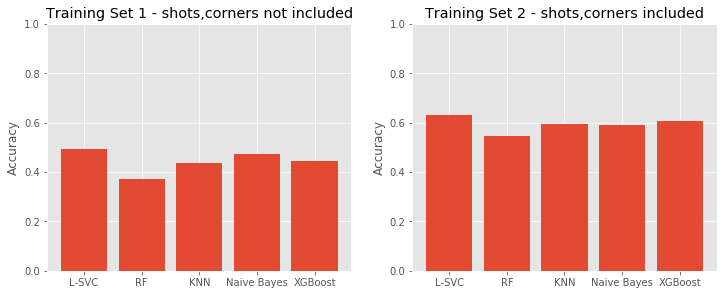

In [436]:
clf = [LinearSVC(),RandomForestClassifier(), KNeighborsClassifier(n_neighbors=17), MultinomialNB(),XGBClassifier()]
labels = ['L-SVC','RF','KNN', 'Naive Bayes','XGBoost']
mean_scores = []
mean_scores_2 = []
cms = []
for i in range (0,5):
    clf[i].fit(X_train,y_train)
    clf[i].fit(X_train_2,y_train)

    scores = cross_val_score(clf[i], X_train, y_train, cv=10)
    scores_2 = cross_val_score(clf[i], X_train_2, y_train, cv=10)
    print (labels[i]," : ", scores.mean(), " : ", scores_2.mean())
    
    mean_scores.append(scores.mean())  
    mean_scores_2.append(scores_2.mean())


fig = plt.figure(figsize = (12,10))

ax = fig.add_subplot(2,2,1)

ax.bar(range(0,5),mean_scores,align='center');
ax.set_xticks(range(5));
ax.set_xticks(range(5));
ax.set_ylim(0,1);
ax.set_ylabel("Accuracy")
ax.set_title("Training Set 1 - shots,corners not included")
ax.set_xticklabels(labels);

ax2 = fig.add_subplot(2,2,2);
ax2.bar(range(0,5),mean_scores_2,align='center');
ax2.set_xticks(range(5))
ax2.set_ylabel("Accuracy")
ax2.set_ylim(0,1);
ax2.set_title("Training Set 2 - shots,corners included")
ax2.set_xticklabels(labels);

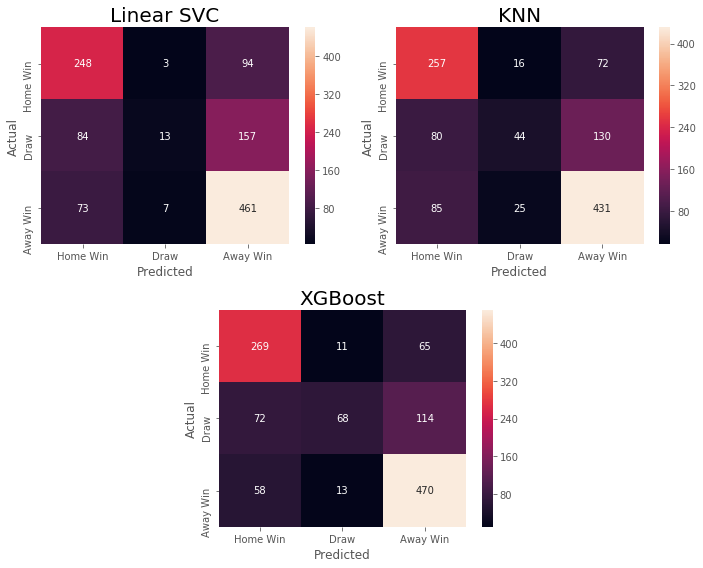

In [437]:
#Plotting Confusion Matrix for select classifiers
import matplotlib.gridspec as gridspec
fig = plt.figure(figsize = (10,8))
plt.style.use('ggplot')
gs = gridspec.GridSpec(2,4)

#Linear SVC
ax1 = fig.add_subplot(gs[0, :2],)
y_pred = clf[0].predict(X_train_2)
confusion_matrix(y_train, y_pred)
conf = pd.DataFrame(confusion_matrix(y_train, y_pred),columns=("Home Win","Draw","Away Win"),index=("Home Win", "Draw","Away Win"))
sns.heatmap(conf,annot=True,fmt='d')
ax1.set_xlabel("Predicted")
ax1.set_ylabel("Actual")
ax1.set_title("Linear SVC",fontsize=20)

#KNN
ax2 = fig.add_subplot(gs[0, 2:])
y_pred = clf[2].predict(X_train_2)
confusion_matrix(y_train, y_pred)
conf = pd.DataFrame(confusion_matrix(y_train, y_pred),columns=("Home Win","Draw","Away Win"),index=("Home Win", "Draw","Away Win"))
sns.heatmap(conf,annot=True,fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("KNN",fontsize=20)

#XGboost
ax3 = fig.add_subplot(gs[1,1:3])
y_pred = clf[4].predict(X_train_2)
confusion_matrix(y_train, y_pred)
conf = pd.DataFrame(confusion_matrix(y_train, y_pred),columns=("Home Win","Draw","Away Win"),index=("Home Win", "Draw","Away Win"))
sns.heatmap(conf,annot=True,fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("XGBoost",fontsize=20)

plt.tight_layout()

In [78]:
#Normalization and feature scaling 
#method 2nd
import pandas as pd
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
%matplotlib inline  
from sklearn.svm import SVC
from sklearn import linear_model

In [79]:
# Indepedent variables and dependent variables
feature_cols = feature_table.columns[3:11]
print("Feature columns:\n{}".format(feature_cols))

Feature columns:
Index(['HST', 'AST', 'HC', 'AC', 'HAS', 'HDS', 'AAS', 'ADS'], dtype='object')


In [80]:
target_cols = feature_table.columns[11]
print("Feature columns:\n{}".format(target_cols))

Feature columns:
Result


In [81]:
feature_set = feature_table[feature_cols]
target_set = feature_table[target_cols]

In [82]:
X = feature_set
y = target_set

In [83]:
# Encoding Categorical Data
from sklearn.preprocessing import LabelEncoder
labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(y)

In [84]:
# Splittig the dataset into train and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state = 100)

In [85]:
# Feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

C:\Users\prade\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\prade\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\prade\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """


In [86]:
# Fitting classifier to the Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0,C=1)
classifier.fit(X_train, y_train)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=0,
  shrinking=True, tol=0.001, verbose=False)

In [96]:
# Applying Grid Search to find the best model and the best parameters
from sklearn.model_selection import GridSearchCV
parameters = [{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
              {'C': [1, 10, 100, 1000], 'kernel': ['rbf'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}]
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search = grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_

C:\Users\prade\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [89]:
# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
accuracies.mean()

0.6300677990551409

In [92]:
# Fitting classifier to the Training set
from xgboost import XGBClassifier
classifier = XGBClassifier(kernel = 'rbf', gamma = 0.8, C=1)
classifier.fit(X_train, y_train)

XGBClassifier(C=1, base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0.8, kernel='rbf',
       learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
       nthread=None, objective='multi:softprob', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1)

In [93]:
# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
accuracies.mean()

0.6037948687895944

In [95]:
# Fitting classifier to the Training set
from sklearn.linear_model import LogisticRegression
# Applying Grid Search to find the best model and the best parameters
from sklearn.model_selection import GridSearchCV
parameters = [{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
              {'C': [1, 10, 100, 1000], 'kernel': ['rbf'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}]
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search = grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_

C:\Users\prade\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'C': 1, 'kernel': 'linear'}

In [52]:
# Fitting classifier to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0 , C=1, multi_class = 'warn')
classifier.fit(X_train, y_train)

C:\Users\prade\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\prade\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [54]:
# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
accuracies.mean()

C:\Users\prade\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\prade\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\prade\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\prade\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\prade\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default so

0.6339452077848703

Adding Recent Performance
It is often noticed the teams that are on a winning streak tend to be on a winning streak. This usually translates to more shots on goal, more number of corners and more goals scored. Under this assumption, we can try to develop a team's recent performance as features in our training set.

N-recent stats
In these features, we include the average number of shots, corners and goals in the last n-matches. We include these statistics for both the home and away teams in any fixture.

pastHS = aver number shots by the home team in recent past pastHC = aver number corners by the home team in recent past pastHG = aver number goals by the home team in recent past

Similarly adding these features for the away team, we have six new features in each row of our training data set.

In [252]:
#method 3
ht = playing_stat.loc[40].HomeTeam
at = playing_stat.loc[40].AwayTeam
ht

'Bournemouth'

In [253]:
feat_table = playing_stat.sort_index(ascending=False)
feat_table = feat_table[['HomeTeam','AwayTeam','FTR','FTHG','FTAG','HS','AS','HC','AC']]
feat_table

,HomeTeam,AwayTeam,FTR,FTHG,FTAG,HS,AS,HC,AC
1139,Watford,West Ham,A,1,4,17,16,7,2
1138,Tottenham,Everton,D,2,2,11,17,7,4
1137,Southampton,Huddersfield,D,1,1,10,10,4,3
1136,Man United,Cardiff,A,0,2,26,13,11,2
1135,Liverpool,Wolves,H,2,0,13,7,4,1
1134,Leicester,Chelsea,D,0,0,9,14,4,5
1133,Fulham,Newcastle,A,0,4,16,13,5,5
1132,Crystal Palace,Bournemouth,H,5,3,17,16,4,4
1131,Burnley,Arsenal,A,1,3,14,17,4,5
1130,Brighton,Man City,A,1,4,6,20,2,6


In [254]:
# Adding next week fixtures
new_fixtures = pd.DataFrame( [['Brighton','Man City','A',0,0,0,0,0,0],
                             ['Burnley','Arsenal','A',0,0,0,0,0,0],
                             ['Crystal Palace','Bournemouth','H',0,0,0,0,0,0],
                             ['Fulham','Newcastle','A',0,0,0,0,0,0],
                             ['Leicester','Chelsea','D',0,0,0,0,0,0],
                             ['Liverpool','Cardiff','H',0,0,0,0,0,0],
                             ['Man United','Hull','A',0,0,0,0,0,0],
                             ['Southampton','Huddersfield','D',0,0,0,0,0,0],
                             ['Tottenham','Everton','D',0,0,0,0,0,0],
                             ['Watford','West Ham','A',0,0,0,0,0,0]],columns=feat_table.columns)

In [255]:
new_feat_table = new_fixtures.append(feat_table,ignore_index=True)
new_feat_table = new_feat_table.sort_index(ascending=False)
new_feat_table = new_feat_table.reset_index().drop(['index'], axis=1)
new_feat_table = new_feat_table.sort_index(ascending=False)
# feat_table = n
feat_table = new_feat_table
feat_table.shape

(1150, 9)

In [256]:
#Adding k recent performance measures
feat_table["pastHS"] = 0.0
feat_table["pastHC"] = 0.0
feat_table["pastAS"] = 0.0
feat_table["pastAC"] = 0.0
feat_table["pastHG"] = 0.0
feat_table["pastAG"] = 0.0

In [257]:
feat_table.head(12)

,HomeTeam,AwayTeam,FTR,FTHG,FTAG,HS,AS,HC,AC,pastHS,pastHC,pastAS,pastAC,pastHG,pastAG
1149,Brighton,Man City,A,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1148,Burnley,Arsenal,A,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1147,Crystal Palace,Bournemouth,H,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1146,Fulham,Newcastle,A,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1145,Leicester,Chelsea,D,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1144,Liverpool,Cardiff,H,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1143,Man United,Hull,A,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1142,Southampton,Huddersfield,D,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1141,Tottenham,Everton,D,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1140,Watford,West Ham,A,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [77]:
# for index,row in feat_table.iterrows():
#     #print row['HomeTeam'], table[table['Team'] == row['HomeTeam']]['HAS'].values

In [258]:
# Adding k recent performance metrics. Change value of k.
k = 3
for i in range(feat_table.shape[0]-1,-1,-1):
    row = feat_table.loc[i]
    ht = row.HomeTeam
    at = row.AwayTeam
    ht_stats = feat_table.loc[i-1:-1][(feat_table.HomeTeam == ht) | (feat_table.AwayTeam == ht)].head(k)
    at_stats = feat_table.loc[i-1:-1][(feat_table.HomeTeam == at) | (feat_table.AwayTeam == at)].head(k)

    feat_table.set_value(i, 'pastHC', (ht_stats[ht_stats["AwayTeam"] == ht].sum().HC + ht_stats[ht_stats["HomeTeam"] == ht].sum().HC)/k)
    feat_table.set_value(i, 'pastAC', (at_stats[at_stats["AwayTeam"] == at].sum().HC + at_stats[at_stats["HomeTeam"] == at].sum().HC)/k)
    feat_table.set_value(i, 'pastHS', (ht_stats[ht_stats["AwayTeam"] == ht].sum().HS + ht_stats[ht_stats["HomeTeam"] == ht].sum().AS)/k)
    feat_table.set_value(i, 'pastAS', (at_stats[at_stats["AwayTeam"] == at].sum().HS + at_stats[at_stats["HomeTeam"] == at].sum().AS)/k)
    feat_table.set_value(i, 'pastHG', (ht_stats[ht_stats["AwayTeam"] == ht].sum().FTAG + ht_stats[ht_stats["HomeTeam"] == ht].sum().FTHG)/k)
    feat_table.set_value(i, 'pastAG', (at_stats[at_stats["AwayTeam"] == at].sum().FTAG + at_stats[at_stats["HomeTeam"] == at].sum().FTHG)/k)

f_HAS = []
f_HDS = []
f_AAS = []
f_ADS = []
for index,row in feat_table.iterrows():
    #print row
    f_HAS.append(table[table['Team'] == row['HomeTeam']]['HAS'].values[0])
    f_HDS.append(table[table['Team'] == row['HomeTeam']]['HDS'].values[0])
    f_AAS.append(table[table['Team'] == row['HomeTeam']]['AAS'].values[0])
    f_ADS.append(table[table['Team'] == row['HomeTeam']]['ADS'].values[0])
    
feat_table['HAS'] = f_HAS
feat_table['HDS'] = f_HDS
feat_table['AAS'] = f_AAS
feat_table['ADS'] = f_ADS
feat_table

C:\Users\prade\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
C:\Users\prade\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\prade\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  # Remove the CWD from sys.path while we load stuff.
C:\Users\prade\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  # This is added back by InteractiveShellApp.init_path()
C:\Users\prade\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  

C:\Users\prade\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
C:\Users\prade\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\prade\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
C:\Users\prade\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\prade\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
C:\Users\prade\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\prade\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean

C:\Users\prade\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
C:\Users\prade\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\prade\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
C:\Users\prade\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\prade\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
C:\Users\prade\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\prade\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean

C:\Users\prade\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
C:\Users\prade\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\prade\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
C:\Users\prade\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\prade\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
C:\Users\prade\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\prade\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean

C:\Users\prade\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\prade\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
C:\Users\prade\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\prade\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
C:\Users\prade\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\prade\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
C:\Users\prade\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Boolean

C:\Users\prade\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
C:\Users\prade\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\prade\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
C:\Users\prade\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\prade\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
C:\Users\prade\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\prade\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean

C:\Users\prade\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\prade\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
C:\Users\prade\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\prade\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
C:\Users\prade\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\prade\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
C:\Users\prade\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Boolean

C:\Users\prade\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\prade\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
C:\Users\prade\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\prade\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
C:\Users\prade\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\prade\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
C:\Users\prade\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Boolean

C:\Users\prade\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\prade\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
C:\Users\prade\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\prade\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
C:\Users\prade\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\prade\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
C:\Users\prade\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Boolean

C:\Users\prade\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\prade\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
C:\Users\prade\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\prade\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
C:\Users\prade\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\prade\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
C:\Users\prade\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Boolean

C:\Users\prade\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\prade\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
C:\Users\prade\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\prade\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
C:\Users\prade\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\prade\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
C:\Users\prade\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Boolean

C:\Users\prade\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\prade\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
C:\Users\prade\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\prade\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
C:\Users\prade\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\prade\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
C:\Users\prade\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Boolean

C:\Users\prade\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\prade\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
C:\Users\prade\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\prade\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
C:\Users\prade\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\prade\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
C:\Users\prade\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Boolean

C:\Users\prade\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
C:\Users\prade\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\prade\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
C:\Users\prade\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\prade\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
C:\Users\prade\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\prade\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean

C:\Users\prade\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\prade\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
C:\Users\prade\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\prade\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
C:\Users\prade\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\prade\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
C:\Users\prade\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Boolean

C:\Users\prade\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\prade\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
C:\Users\prade\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\prade\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
C:\Users\prade\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\prade\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
C:\Users\prade\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Boolean

C:\Users\prade\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\prade\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
C:\Users\prade\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\prade\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
C:\Users\prade\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\prade\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
C:\Users\prade\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Boolean

C:\Users\prade\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\prade\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
C:\Users\prade\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\prade\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
C:\Users\prade\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\prade\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
C:\Users\prade\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Boolean

C:\Users\prade\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\prade\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
C:\Users\prade\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\prade\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
C:\Users\prade\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\prade\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
C:\Users\prade\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Boolean

C:\Users\prade\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\prade\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
C:\Users\prade\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\prade\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
C:\Users\prade\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\prade\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
C:\Users\prade\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Boolean

C:\Users\prade\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\prade\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
C:\Users\prade\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\prade\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
C:\Users\prade\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\prade\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
C:\Users\prade\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Boolean

C:\Users\prade\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\prade\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
C:\Users\prade\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\prade\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
C:\Users\prade\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\prade\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
C:\Users\prade\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Boolean

C:\Users\prade\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
C:\Users\prade\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\prade\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
C:\Users\prade\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\prade\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
C:\Users\prade\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\prade\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean

,HomeTeam,AwayTeam,FTR,FTHG,FTAG,HS,AS,HC,AC,pastHS,pastHC,pastAS,pastAC,pastHG,pastAG,HAS,HDS,AAS,ADS
1149,Brighton,Man City,A,0,0,0,0,0,0,16.333333,8.333333,5.000000,4.333333,1.000000,2.000000,0.873950,1.241782,0.803506,1.086835
1148,Burnley,Arsenal,A,0,0,0,0,0,0,20.666667,4.000000,16.333333,9.333333,0.333333,1.333333,0.941176,1.154127,0.861943,0.985994
1147,Crystal Palace,Bournemouth,H,0,0,0,0,0,0,18.666667,6.333333,16.666667,7.666667,2.666667,2.333333,0.918768,0.905771,1.373265,1.064426
1146,Fulham,Newcastle,A,0,0,0,0,0,0,15.000000,7.333333,12.000000,4.666667,0.333333,2.333333,0.862745,1.241782,0.818115,1.086835
1145,Leicester,Chelsea,D,0,0,0,0,0,0,13.000000,7.666667,10.333333,5.333333,1.000000,1.333333,0.918768,0.891161,1.008035,0.952381
1144,Liverpool,Cardiff,H,0,0,0,0,0,0,8.666667,3.333333,18.333333,10.333333,3.333333,1.333333,1.355742,0.745069,1.066472,0.694678
1143,Man United,Hull,A,0,0,0,0,0,0,12.000000,6.666667,0.000000,0.000000,0.666667,0.000000,0.907563,0.934989,1.227173,0.851541
1142,Southampton,Huddersfield,D,0,0,0,0,0,0,12.000000,5.000000,18.000000,3.666667,1.333333,0.666667,0.907563,1.154127,0.993426,0.907563
1141,Tottenham,Everton,D,0,0,0,0,0,0,17.666667,6.333333,8.000000,6.666667,0.666667,1.333333,1.064426,0.876552,1.008035,1.064426
1140,Watford,West Ham,A,0,0,0,0,0,0,15.333333,5.666667,14.000000,3.666667,0.666667,2.666667,0.896359,1.124909,0.964207,0.985994


In [259]:
test_table = feat_table.drop(['FTHG','FTAG','HS','AS','HC','AC'],axis=1)
test_table

,HomeTeam,AwayTeam,FTR,pastHS,pastHC,pastAS,pastAC,pastHG,pastAG,HAS,HDS,AAS,ADS
1149,Brighton,Man City,A,16.333333,8.333333,5.000000,4.333333,1.000000,2.000000,0.873950,1.241782,0.803506,1.086835
1148,Burnley,Arsenal,A,20.666667,4.000000,16.333333,9.333333,0.333333,1.333333,0.941176,1.154127,0.861943,0.985994
1147,Crystal Palace,Bournemouth,H,18.666667,6.333333,16.666667,7.666667,2.666667,2.333333,0.918768,0.905771,1.373265,1.064426
1146,Fulham,Newcastle,A,15.000000,7.333333,12.000000,4.666667,0.333333,2.333333,0.862745,1.241782,0.818115,1.086835
1145,Leicester,Chelsea,D,13.000000,7.666667,10.333333,5.333333,1.000000,1.333333,0.918768,0.891161,1.008035,0.952381
1144,Liverpool,Cardiff,H,8.666667,3.333333,18.333333,10.333333,3.333333,1.333333,1.355742,0.745069,1.066472,0.694678
1143,Man United,Hull,A,12.000000,6.666667,0.000000,0.000000,0.666667,0.000000,0.907563,0.934989,1.227173,0.851541
1142,Southampton,Huddersfield,D,12.000000,5.000000,18.000000,3.666667,1.333333,0.666667,0.907563,1.154127,0.993426,0.907563
1141,Tottenham,Everton,D,17.666667,6.333333,8.000000,6.666667,0.666667,1.333333,1.064426,0.876552,1.008035,1.064426
1140,Watford,West Ham,A,15.333333,5.666667,14.000000,3.666667,0.666667,2.666667,0.896359,1.124909,0.964207,0.985994


In [260]:
test_table["Result"] = test_table.apply(lambda row: transformResult(row),axis=1)
test_table.sort_index(inplace=True)
test_table

,HomeTeam,AwayTeam,FTR,pastHS,pastHC,pastAS,pastAC,pastHG,pastAG,HAS,HDS,AAS,ADS,Result
0,Man United,Leicester,A,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.907563,0.934989,1.227173,0.851541,-1
1,Bournemouth,Cardiff,A,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.896359,1.124909,0.847334,1.120448,-1
2,Fulham,Crystal Palace,D,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.862745,1.241782,0.818115,1.086835,0
3,Huddersfield,Chelsea,H,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.717087,1.139518,0.905771,1.098039,1
4,Newcastle,Tottenham,H,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.963585,1.037253,1.051863,1.098039,1
5,Watford,Brighton,D,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.896359,1.124909,0.964207,0.985994,0
6,Wolves,Everton,D,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.997199,0.818115,0.978817,1.019608,0
7,Arsenal,Man City,A,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.187675,0.788897,0.978817,0.997199,-1
8,Liverpool,West Ham,A,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.355742,0.745069,1.066472,0.694678,-1
9,Southampton,Burnley,H,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.907563,1.154127,0.993426,0.907563,1


In [261]:
test_table.to_csv("C:/Users/prade/OneDrive/Desktop/Football/test_table.csv")

In [262]:
# Indepedent variables and dependent variables
feature_cols = test_table.columns[3:13]
print("Feature columns:\n{}".format(feature_cols))

Feature columns:
Index(['pastHS', 'pastHC', 'pastAS', 'pastAC', 'pastHG', 'pastAG', 'HAS',
       'HDS', 'AAS', 'ADS'],
      dtype='object')


In [263]:
target_cols = test_table.columns[13]
print("Feature columns:\n{}".format(target_cols))

Feature columns:
Result


In [264]:
feature_set = test_table[feature_cols]
target_set = test_table[target_cols]

In [265]:
X = feature_set
y = target_set

In [266]:
# Encoding Categorical Data
from sklearn.preprocessing import LabelEncoder
labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(y)

In [267]:
# Splittig the dataset into train and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state = 100)

In [268]:
# Feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [269]:
# Applying Grid Search to find the best model and the best parameters
from sklearn.model_selection import GridSearchCV
parameters = [{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
              {'C': [1, 10, 100, 1000], 'kernel': ['rbf'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}]
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search = grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
best_classifier = grid_search.best_estimator_
best_classifier

C:\Users\prade\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


XGBClassifier(C=1, base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0.9, kernel='rbf',
       learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
       nthread=None, objective='multi:softprob', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1)

In [279]:
# Fitting classifier to the Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0,C=1)
classifier.fit(X_train, y_train)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=0,
  shrinking=True, tol=0.001, verbose=False)

In [280]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [281]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [282]:
# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
accuracies.mean()

0.45718410651054475

In [283]:
# Fitting classifier to the Training set
from xgboost import XGBClassifier
classifier = XGBClassifier(kernel = 'rbf', gamma=0.8, C=1, random_state=0 )
classifier.fit(X_train, y_train)

XGBClassifier(C=1, base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0.8, kernel='rbf',
       learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
       nthread=None, objective='multi:softprob', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1)

In [284]:
# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
accuracies.mean()

0.4908345482716431

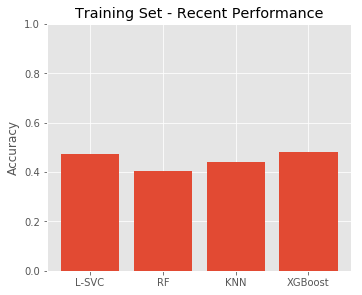

In [292]:
labels = ['L-SVC','RF','KNN','XGBoost']

fig = plt.figure(figsize = (12,10))

ax = fig.add_subplot(2,2,1)

ax.bar(range(0,4),mean_scores,align='center');
ax.set_xticks(range(4));
ax.set_xticks(range(4));
ax.set_ylim(0,1);
ax.set_ylabel("Accuracy")
ax.set_title("Training Set - Recent Performance")
ax.set_xticklabels(labels);

C:\Users\prade\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\prade\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\prade\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\prade\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\prade\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", 

L-SVC  :  0.4732998343872327
RF  :  0.4022848225141886
KNN  :  0.4398500384968688
XGBoost  :  0.4820189416029181


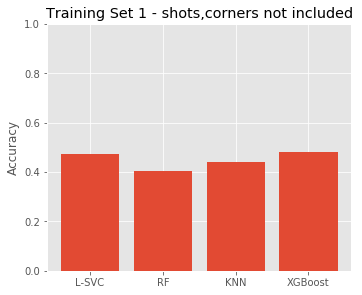

In [291]:
clf = [LinearSVC(),RandomForestClassifier(),KNeighborsClassifier(n_neighbors=17),XGBClassifier()]
labels = ['L-SVC','RF','KNN','XGBoost']
mean_scores = []
cms = []
for i in range (0,4):
    clf[i].fit(X_train,y_train)
    scores = cross_val_score(clf[i], X_train, y_train, cv=10)
    print (labels[i]," : ", scores.mean())
    
    mean_scores.append(scores.mean())


fig = plt.figure(figsize = (12,10))

ax = fig.add_subplot(2,2,1)

ax.bar(range(0,4),mean_scores,align='center');
ax.set_xticks(range(4));
ax.set_xticks(range(4));
ax.set_ylim(0,1);
ax.set_ylabel("Accuracy")
ax.set_title("Training Set 1 - shots,corners not included")
ax.set_xticklabels(labels);

Testing Explained
Since matches occur sequentially and we are calculating the features that involve looking at the recent performance of teams, we cannot do cross validation. This is so because a 10-fold cross validation will choose the test set at random and will not always be the last 1/10th of the data.

Hence, to avert this problem, we train on the initial n number of matches and test on the remaining matches.

In [312]:
#method 5
# num_games decides the train-test split
print(feat_table.shape)
num_games = feat_table.shape[0]-10
num_games

(1150, 19)


1140

In [313]:
X_train = test_table[['pastHS','pastHC','pastAS','pastAC','pastHG','pastAG','HAS','HDS','AAS','ADS']].loc[0:num_games]
y_train = test_table['Result'].loc[0:num_games]
X_test = test_table[['pastHS','pastHC','pastAS','pastAC','pastHG','pastAG','HAS','HDS','AAS','ADS']].loc[num_games:]
y_test = test_table['Result'].loc[num_games:]

In [314]:
#Testing on these classifiers
clfs = ['DT','L-SVC','RF','KNN','Logit']
clf1 = DecisionTreeClassifier()
clf2 = LinearSVC()
clf3 = RandomForestClassifier()
clf4 = KNeighborsClassifier(n_neighbors=13)
clf5 = LogisticRegression(solver='lbfgs',multi_class='multinomial')

clf1.fit(X_train,y_train)
clf2.fit(X_train,y_train)
clf3.fit(X_train,y_train)
clf4.fit(X_train,y_train)
clf5.fit(X_train,y_train)

C:\Users\prade\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\prade\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\prade\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

Decision Tree :  0.5
Linear SVC :  0.7
Random Forest :  0.7
KNN Classifier :  0.5
Logistic Regression :  0.6


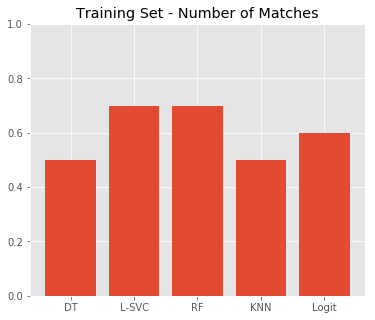

In [319]:
scores_recent_perf = [accuracy_score(y_test,clf1.predict(X_test)),accuracy_score(y_test,clf2.predict(X_test)),
                      accuracy_score(y_test,clf3.predict(X_test)),accuracy_score(y_test,clf4.predict(X_test)),
                      accuracy_score(y_test,clf5.predict(X_test))]

print ("Decision Tree : ", scores_recent_perf[0])
print ("Linear SVC : ", scores_recent_perf[1])
print ("Random Forest : ", scores_recent_perf[2])
print ("KNN Classifier : ", scores_recent_perf[3])
print ("Logistic Regression : ", scores_recent_perf[4])

fig = plt.figure(figsize = (6,5))
ax = fig.add_subplot(111)
rect = ax.bar(range(0,5),scores_recent_perf,align='center')
ax.set_ylim(0,1);
ax.set_xticks(range(0,5));
ax.set_title("Training Set - Number of Matches")
ax.set_xticklabels(clfs);

In [337]:
#KNN
plot_scores_knn = []
for b in range(1,50):
    clf4 = KNeighborsClassifier(n_neighbors=b)
    clf4.fit(X_train,y_train)
    scores = accuracy_score(y_test,clf4.predict(X_test))
    plot_scores_knn.append(scores)

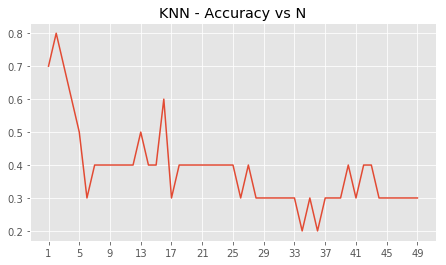

In [339]:
fig = plt.figure(figsize = (16,4))
plt.style.use('ggplot')

ax1 = fig.add_subplot(1,2,1)
ax1.plot(range(1,50),plot_scores_knn);
ax1.set_title("KNN - Accuracy vs N")
ax1.set_xticks(range(1,50,4));

In [317]:
# Fitting classifier to the Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0,C=1)
classifier.fit(X_train, y_train)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=0,
  shrinking=True, tol=0.001, verbose=False)

In [318]:
# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
accuracies.mean()

0.4741706429039789

Adding home advantage
Another factor that always comes into play when trying to predict the outcome of a match is which of the two teams is playing home. Instead of explicitly creating a separate feature to contain this information, we take the difference between the the recent performance stats of the home team and the the recent performance stats of the away team. Also note that this order inherently stores the information about which team is playing home and which team is playing away.

In [364]:
#Method 6
test_table["pastCornerDiff"] = (test_table["pastHC"] - test_table["pastAC"])/k
test_table["pastGoalDiff"] = (test_table["pastHG"] - test_table["pastAG"])/k
test_table["pastShotsDiff"] = (test_table["pastHS"] - test_table["pastAG"])/k

In [365]:
''' number of games to exclude in the training set for validation
For example, if 240 games have been played, test_table has 250 fixtures - the last 10 being the ones that haven't
been played. So, we set aside 20 fixtures from the training set containing 240 fixtures for validation.''' 
num_games = feat_table.shape[0]-10
print(num_games)
v_split = 15
n_games = num_games - v_split

1140


In [366]:
test_table = test_table.fillna(0)

In [367]:
test_table.head()

,HomeTeam,AwayTeam,FTR,pastHS,pastHC,pastAS,pastAC,pastHG,pastAG,HAS,HDS,AAS,ADS,Result,pastCornerDiff,pastGoalDiff,pastShotsDiff
0,Man United,Leicester,A,0.0,0.0,0.0,0.0,0.0,0.0,0.907563,0.934989,1.227173,0.851541,-1,0.0,0.0,0.0
1,Bournemouth,Cardiff,A,0.0,0.0,0.0,0.0,0.0,0.0,0.896359,1.124909,0.847334,1.120448,-1,0.0,0.0,0.0
2,Fulham,Crystal Palace,D,0.0,0.0,0.0,0.0,0.0,0.0,0.862745,1.241782,0.818115,1.086835,0,0.0,0.0,0.0
3,Huddersfield,Chelsea,H,0.0,0.0,0.0,0.0,0.0,0.0,0.717087,1.139518,0.905771,1.098039,1,0.0,0.0,0.0
4,Newcastle,Tottenham,H,0.0,0.0,0.0,0.0,0.0,0.0,0.963585,1.037253,1.051863,1.098039,1,0.0,0.0,0.0


In [368]:
test_table.drop(['pastHC','pastAS','pastAC','pastHG','pastAG'],axis=1)
X_train = test_table[['pastCornerDiff','pastGoalDiff','pastShotsDiff','HAS','HDS','AAS','ADS']].loc[0:n_games]
y_train = test_table['Result'].loc[0:n_games]
X_test = test_table[['pastCornerDiff','pastGoalDiff','pastShotsDiff','HAS','HDS','AAS','ADS']].loc[n_games:num_games-1]
y_test = test_table['Result'].loc[n_games:num_games-1]
X_predict = test_table[['pastCornerDiff','pastGoalDiff','pastShotsDiff','HAS','HDS','AAS','ADS']].loc[num_games:]

In [369]:
X_predict

,pastCornerDiff,pastGoalDiff,pastShotsDiff,HAS,HDS,AAS,ADS
1140,0.666667,-0.666667,4.222222,0.896359,1.124909,0.964207,0.985994
1141,-0.111111,-0.222222,5.444444,1.064426,0.876552,1.008035,1.064426
1142,0.444444,0.222222,3.777778,0.907563,1.154127,0.993426,0.907563
1143,2.222222,0.222222,4.000000,0.907563,0.934989,1.227173,0.851541
1144,-2.333333,0.666667,2.444444,1.355742,0.745069,1.066472,0.694678
1145,0.777778,-0.111111,3.888889,0.918768,0.891161,1.008035,0.952381
1146,0.888889,-0.666667,4.222222,0.862745,1.241782,0.818115,1.086835
1147,-0.444444,0.111111,5.444444,0.918768,0.905771,1.373265,1.064426
1148,-1.777778,-0.333333,6.444444,0.941176,1.154127,0.861943,0.985994
1149,1.333333,-0.333333,4.777778,0.873950,1.241782,0.803506,1.086835


In [376]:
clfs = ['DT','XGB','RF','KNN','Logit']
clf1 = DecisionTreeClassifier()
#clf2 = MultinomialNB(alpha=3)
clf3 = XGBClassifier(n_estimators=13,max_depth=10)
clf4 = RandomForestClassifier()
clf5 = KNeighborsClassifier(n_neighbors=11)
clf6 = LogisticRegression(C=1,solver='lbfgs',multi_class='multinomial')

clf1.fit(X_train,y_train)
#clf2.fit(X_train,y_train)
clf3.fit(X_train,y_train)
clf4.fit(X_train,y_train)
clf5.fit(X_train,y_train)
clf6.fit(X_train,y_train)

C:\Users\prade\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\prade\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

Decision Tree :  0.3333333333333333
XGB Classifier :  0.4666666666666667
Random Forest :  0.4
KNN Classifier :  0.26666666666666666
Logistic Regression :  0.5333333333333333


[Text(0, 0, 'DT'),
 Text(0, 0, 'XGB'),
 Text(0, 0, 'RF'),
 Text(0, 0, 'KNN'),
 Text(0, 0, 'Logit')]

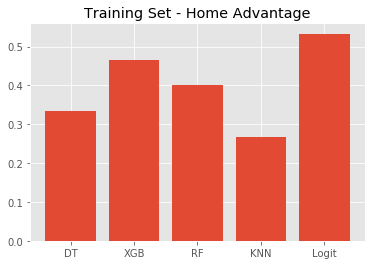

In [380]:
scores_recent_perf = [accuracy_score(y_test,clf1.predict(X_test)),accuracy_score(y_test,clf3.predict(X_test)),accuracy_score(y_test,clf4.predict(X_test)),
                      accuracy_score(y_test,clf5.predict(X_test)),accuracy_score(y_test,clf6.predict(X_test))]

print ("Decision Tree : ", scores_recent_perf[0])
print ("XGB Classifier : ", scores_recent_perf[1])
print ("Random Forest : ", scores_recent_perf[2])
print ("KNN Classifier : ", scores_recent_perf[3])
print ("Logistic Regression : ", scores_recent_perf[4])

fig = plt.figure(figsize = (6,4))
ax = fig.add_subplot(1,1,1)
rect = ax.bar(range(0,5),scores_recent_perf,align='center')
ax.set_xticks(range(0,5));
ax.set_title("Training Set - Home Advantage")
ax.set_xticklabels(clfs)

In [381]:
#KNN
plot_scores_knn = []
for b in range(1,50):
    clf5 = KNeighborsClassifier(n_neighbors=b)
    clf5.fit(X_train,y_train)
    scores = accuracy_score(y_test,clf5.predict(X_test))
    plot_scores_knn.append(scores)

#XGBClassifier
plot_scores_xgb = []
for i in range(1,100):
    clf3 = XGBClassifier(n_estimators=i,max_depth=100)
    clf3.fit(X_train, y_train)
    scores = accuracy_score(y_test,clf3.predict(X_test))
    plot_scores_xgb.append(scores)
    
#Logistic Regression
plot_scores_MNB = []
cs = [0.01,0.02,0.1,0.5,1,3,4,5,10]
for c in cs:
    clf6 = LogisticRegression(C=c,solver='lbfgs',multi_class='multinomial')
    clf6.fit(X_train, y_train)
    scores = accuracy_score(y_test,clf6.predict(X_test))
    plot_scores_MNB.append(scores)

C:\Users\prade\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\prade\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\prade\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\prade\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\prade\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", Convergenc

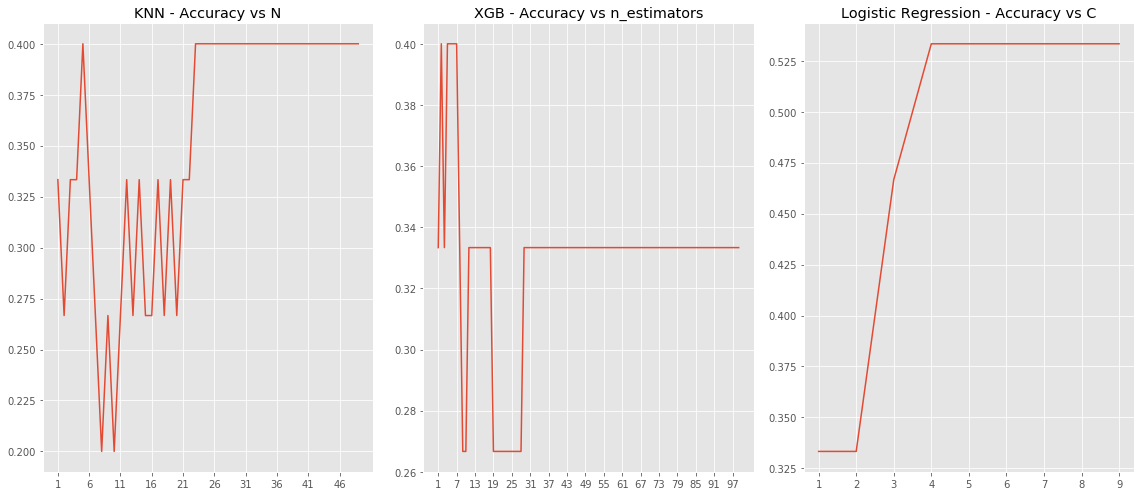

In [382]:
fig = plt.figure(figsize = (16,7))
# plt.style.use('ggplot')

ax1 = fig.add_subplot(1,3,1)
ax1.plot(range(1,50),plot_scores_knn);
ax1.set_title("KNN - Accuracy vs N")
ax1.set_xticks(range(1,50,5));

ax2 = fig.add_subplot(1,3,2)
ax2.plot(range(1,100),plot_scores_XGB);
ax2.set_xticks(range(1,100,6));
ax2.set_title("XGB - Accuracy vs n_estimators")

ax3 = fig.add_subplot(1,3,3)
ax3.plot(range(1,10),plot_scores_logreg);
ax3.set_xticks(range(1,10));
ax3.set_title("Logistic Regression - Accuracy vs C")

fig.tight_layout()

In [385]:
max_knn_n = max(plot_scores_knn)
max_knn_ind = plot_scores_knn.index(max_knn_n) 
max_XGB_e = max(plot_scores_XGB)
max_XGB_ind = plot_scores_XGB.index(max_XGB_e) 

max_logreg_c = max(plot_scores_logreg)
max_logreg_ind = plot_scores_logreg.index(max_logreg_c)

print(max_knn_n, max_knn_ind)
print(max_XGB_e, max_XGB_ind)
print(max_logreg_c, max_logreg_ind)

#max_knn_ind=15 
#max_XGB_ind=40
#max_logreg_ind=3

0.4 4
0.4 1
0.5333333333333333 3


In [386]:
clf_knn = KNeighborsClassifier(n_neighbors=max_knn_ind).fit(X_train,y_train)
clf_XGB = XGBClassifier(n_estimators=max_XGB_ind).fit(X_train,y_train)
clf_logreg = LogisticRegression(C=max_logreg_ind,solver='lbfgs',multi_class='ovr').fit(X_train,y_train)

In [387]:
y_pred_knn = clf_knn.predict(X_predict)
y_pred_XGB = clf_XGB.predict(X_predict)
y_pred_logreg = clf_logreg.predict(X_predict)

In [388]:
this_week = test_table[['HomeTeam','AwayTeam']].loc[num_games:]
this_week['Result_knn']=y_pred_knn
this_week['Result_XGB']=y_pred_XGB
this_week['Result_logreg']=y_pred_logreg

In [389]:
this_week

,HomeTeam,AwayTeam,Result_knn,Result_XGB,Result_logreg
1140,Watford,West Ham,-1,-1,-1
1141,Tottenham,Everton,0,1,1
1142,Southampton,Huddersfield,-1,1,1
1143,Man United,Hull,-1,0,1
1144,Liverpool,Cardiff,1,1,1
1145,Leicester,Chelsea,1,1,1
1146,Fulham,Newcastle,-1,-1,-1
1147,Crystal Palace,Bournemouth,1,1,1
1148,Burnley,Arsenal,0,-1,-1
1149,Brighton,Man City,-1,-1,-1


In [390]:
def transformResultBack(row,col_name):
    if(row[col_name] == 1):
        return 'H'
    elif(row[col_name] == -1):
        return 'A'
    else:
        return 'D'

In [391]:
this_week["Res_knn"] = this_week.apply(lambda row: transformResultBack(row,"Result_knn"),axis=1)
this_week["Res_XGB"] = this_week.apply(lambda row: transformResultBack(row,"Result_XGB"),axis=1)
this_week["Res_logreg"] = this_week.apply(lambda row: transformResultBack(row,"Result_logreg"),axis=1)

this_week.drop(["Result_knn", "Result_XGB","Result_logreg"],axis=1,inplace=True)

In [392]:
print(max_knn_n, max_XGB_e, max_logreg_c)
this_week

0.4 0.4 0.5333333333333333


,HomeTeam,AwayTeam,Res_knn,Res_XGB,Res_logreg
1140,Watford,West Ham,A,A,A
1141,Tottenham,Everton,D,H,H
1142,Southampton,Huddersfield,A,H,H
1143,Man United,Hull,A,D,H
1144,Liverpool,Cardiff,H,H,H
1145,Leicester,Chelsea,H,H,H
1146,Fulham,Newcastle,A,A,A
1147,Crystal Palace,Bournemouth,H,H,H
1148,Burnley,Arsenal,D,A,A
1149,Brighton,Man City,A,A,A


In [393]:
clfs = ['DT','XGB','RF','L-SVC','Logit']
clf1 = DecisionTreeClassifier()
#clf2 = MultinomialNB(alpha=3)
clf3 = XGBClassifier(n_estimators=13,max_depth=10)
clf4 = RandomForestClassifier()
clf5 = LinearSVC()
clf6 = LogisticRegression(C=1,solver='lbfgs',multi_class='multinomial')

clf1.fit(X_train,y_train)
#clf2.fit(X_train,y_train)
clf3.fit(X_train,y_train)
clf4.fit(X_train,y_train)
clf5.fit(X_train,y_train)
clf6.fit(X_train,y_train)

C:\Users\prade\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\prade\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\prade\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [401]:
#KNN
plot_scores_LSVM = []
for b in range(1,50):
    clf5 = LinearSVC()
    clf5.fit(X_train,y_train)
    scores = accuracy_score(y_test,clf5.predict(X_test))
    plot_scores_LSVM.append(scores)

#XGBClassifier
plot_scores_XGB = []
for i in range(1,100):
    clf3 = XGBClassifier(n_estimators=i,max_depth=100)
    clf3.fit(X_train, y_train)
    scores = accuracy_score(y_test,clf3.predict(X_test))
    plot_scores_XGB.append(scores)
    
#Logistic Regression
plot_scores_LR = []
cs = [0.01,0.02,0.1,0.5,1,3,4,5,10]
for c in cs:
    clf6 = LogisticRegression(C=c,solver='lbfgs',multi_class='multinomial')
    clf6.fit(X_train, y_train)
    scores = accuracy_score(y_test,clf6.predict(X_test))
    plot_scores_LR.append(scores)

C:\Users\prade\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\prade\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\prade\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\prade\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\prade\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", 

C:\Users\prade\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\prade\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\prade\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\prade\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\prade\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", 

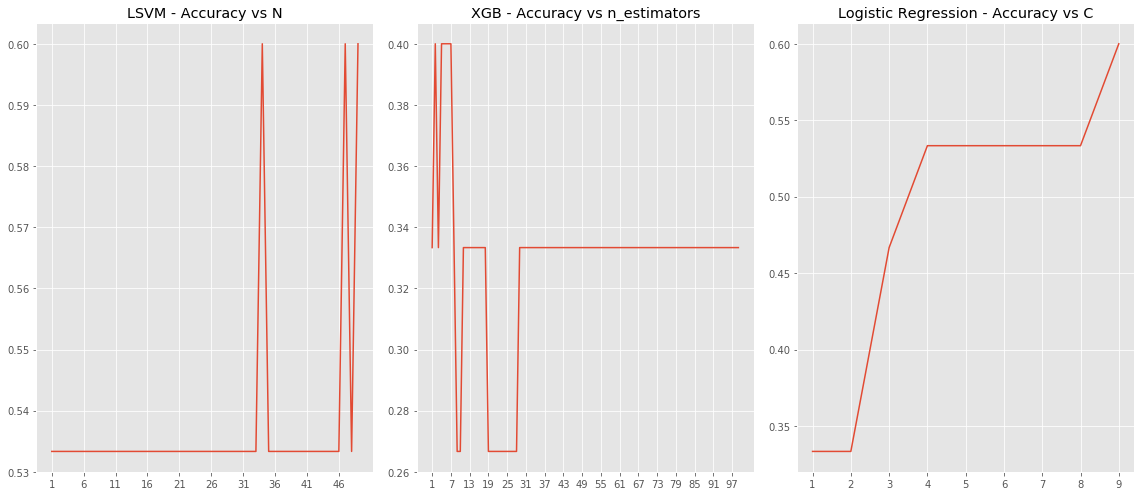

In [402]:
fig = plt.figure(figsize = (16,7))
# plt.style.use('ggplot')

ax1 = fig.add_subplot(1,3,1)
ax1.plot(range(1,50),plot_scores_LSVM);
ax1.set_title("LSVM - Accuracy vs N")
ax1.set_xticks(range(1,50,5));

ax2 = fig.add_subplot(1,3,2)
ax2.plot(range(1,100),plot_scores_XGB);
ax2.set_xticks(range(1,100,6));
ax2.set_title("XGB - Accuracy vs n_estimators")

ax3 = fig.add_subplot(1,3,3)
ax3.plot(range(1,10),plot_scores_LR);
ax3.set_xticks(range(1,10));
ax3.set_title("Logistic Regression - Accuracy vs C")

fig.tight_layout()

In [403]:
max_LSVM_n = max(plot_scores_LSVM)
max_LSVM_ind = plot_scores_LSVM.index(max_LSVM_n) 

max_XGB_e = max(plot_scores_XGB)
max_XGB_ind = plot_scores_XGB.index(max_XGB_e) 

max_LR_c = max(plot_scores_LR)
max_LR_ind = plot_scores_LR.index(max_LR_c)

print(max_LSVM_n, max_LSVM_ind)
print(max_XGB_e, max_XGB_ind)
print(max_LR_c, max_LR_ind)

#max_knn_ind=15 
#max_XGB_ind=40
#max_logreg_ind=3

0.6 33
0.4 1
0.6 8


In [404]:
clf_LSVM = LinearSVC().fit(X_train,y_train)
clf_XGB = XGBClassifier(n_estimators=max_XGB_ind).fit(X_train,y_train)
clf_LR = LogisticRegression(C=max_logreg_ind,solver='lbfgs',multi_class='ovr').fit(X_train,y_train)

C:\Users\prade\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [405]:
y_pred_LSVM = clf_LSVM.predict(X_predict)
y_pred_XGB = clf_XGB.predict(X_predict)
y_pred_LR = clf_LR.predict(X_predict)

In [406]:
this_week = test_table[['HomeTeam','AwayTeam']].loc[num_games:]
this_week['Result_LSVM']=y_pred_LSVM
this_week['Result_XGB']=y_pred_XGB
this_week['Result_LR']=y_pred_LR

In [407]:
this_week

,HomeTeam,AwayTeam,Result_LSVM,Result_XGB,Result_LR
1140,Watford,West Ham,-1,-1,-1
1141,Tottenham,Everton,1,1,1
1142,Southampton,Huddersfield,1,1,1
1143,Man United,Hull,1,0,1
1144,Liverpool,Cardiff,1,1,1
1145,Leicester,Chelsea,1,1,1
1146,Fulham,Newcastle,-1,-1,-1
1147,Crystal Palace,Bournemouth,1,1,1
1148,Burnley,Arsenal,-1,-1,-1
1149,Brighton,Man City,-1,-1,-1


In [408]:
def transformResultBack(row,col_name):
    if(row[col_name] == 1):
        return 'H'
    elif(row[col_name] == -1):
        return 'A'
    else:
        return 'D'

In [410]:
this_week["Res_LSVM"] = this_week.apply(lambda row: transformResultBack(row,"Result_LSVM"),axis=1)
this_week["Res_XGB"] = this_week.apply(lambda row: transformResultBack(row,"Result_XGB"),axis=1)
this_week["Res_LR"] = this_week.apply(lambda row: transformResultBack(row,"Result_LR"),axis=1)

this_week.drop(["Result_LSVM", "Result_XGB","Result_LR"],axis=1,inplace=True)

In [411]:
print(max_LSVM_n, max_XGB_e, max_LR_c)
this_week

0.6 0.4 0.6


,HomeTeam,AwayTeam,Res_LSVM,Res_XGB,Res_LR
1140,Watford,West Ham,A,A,A
1141,Tottenham,Everton,H,H,H
1142,Southampton,Huddersfield,H,H,H
1143,Man United,Hull,H,D,H
1144,Liverpool,Cardiff,H,H,H
1145,Leicester,Chelsea,H,H,H
1146,Fulham,Newcastle,A,A,A
1147,Crystal Palace,Bournemouth,H,H,H
1148,Burnley,Arsenal,A,A,A
1149,Brighton,Man City,A,A,A
